In [1]:
# import splitfolders

In [2]:
# pip install split-folders

In [3]:
# splitfolders.ratio("IMAGES",output="IMAGES2",seed=1337,ratio=(0.8,0.1,0.1))

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow
from keras.models import Sequential
from keras.layers import ReLU,PReLU
from keras.layers import Dense,Flatten,Input

In [2]:
from keras.layers import Conv2D

In [3]:
#now first we create a keras tunner

# Implimenting tuner

In [4]:
from kerastuner import RandomSearch

C:\Users\Parthraj\AppData\Local\Temp\ipykernel_28576\659161079.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [5]:
def model_creation(hp):
    model=Sequential()
    model.add(Input(shape=(64, 64, 3)))
    for i in range(hp.Int("num_layers", 2, 20)):
        model.add(Conv2D(filters=hp.Int("conv_1_filters" + str(i),min_value=32,max_value=128,step=16),
        kernel_size=hp.Choice("conv_1_kernel" + str(i),values=[3,5]),
        activation="relu",
        input_shape=(28,28,1)
        )),
    model.add(Flatten()),
    for j in range(hp.Int("num_layers_1", 2, 20)):
        model.add(Dense(
        units=hp.Int('dense_1_units'+ str(j), min_value=32, max_value=128, step=16),
        activation='relu')),
    model.add(Dense(units=1,activation="sigmoid"))    
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return model

In [6]:
tuner = RandomSearch(model_creation, objective = "val_accuracy", max_trials= 5, executions_per_trial= 3 )

Reloading Tuner from .\untitled_project\tuner0.json


# Loading and Preprocessing image

In [7]:
from keras.preprocessing import image

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img

In [9]:
train_path="IMAGES2/train"
train_datagen=ImageDataGenerator(rescale=1/255)
train_data= train_datagen.flow_from_directory(train_path, batch_size=32, target_size=(64,64),class_mode="binary")
val_path="IMAGES2/val"
val_data=train_datagen.flow_from_directory(val_path, batch_size=32, target_size=(64,64),class_mode="binary")

Found 19998 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.


In [10]:
train_data.class_indices

{'Cat': 0, 'Dog': 1}

In [11]:
train_data.classes.shape

(19998,)

In [12]:
import os

# Print images from cat and dog from Training data

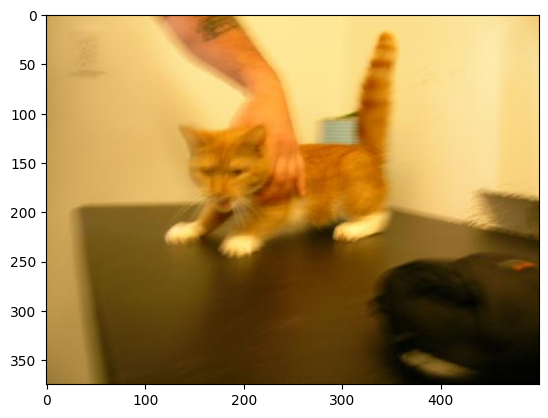

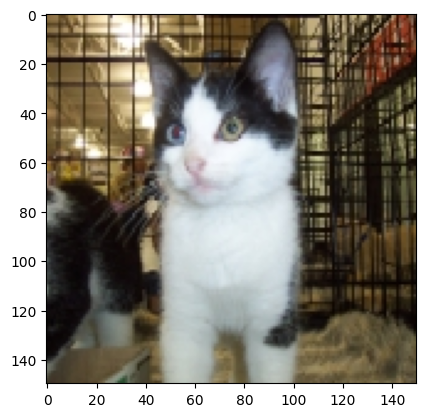

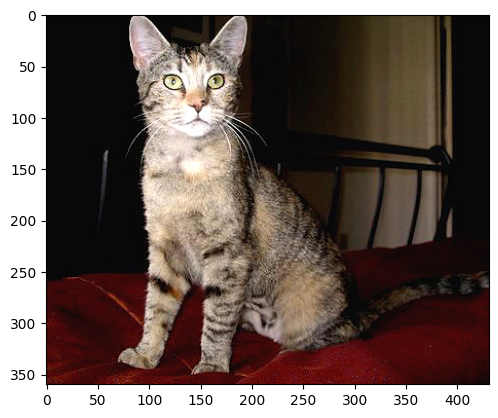

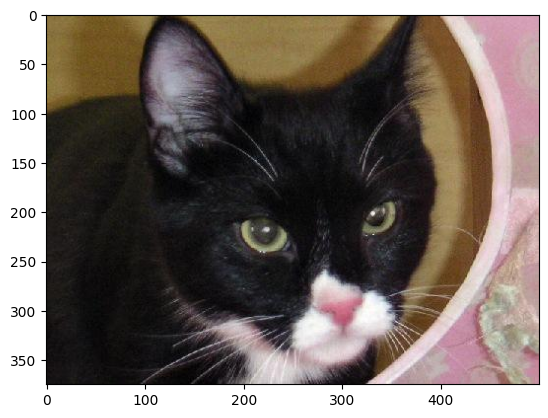

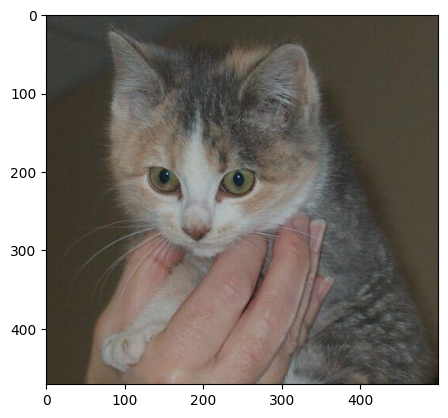

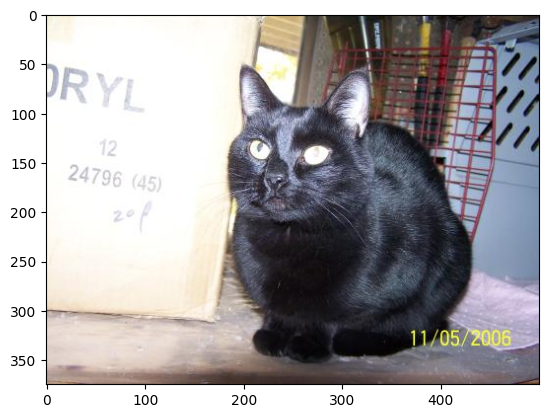

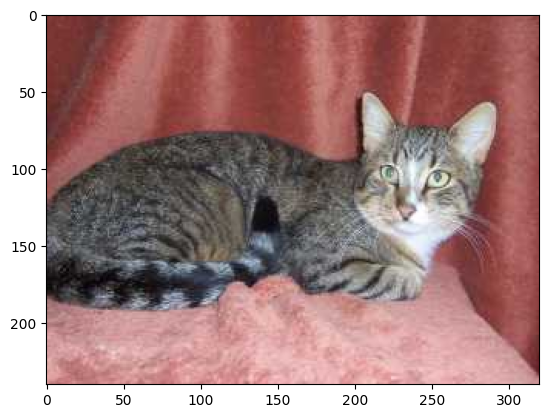

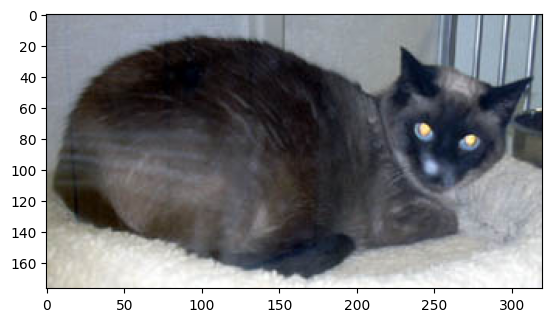

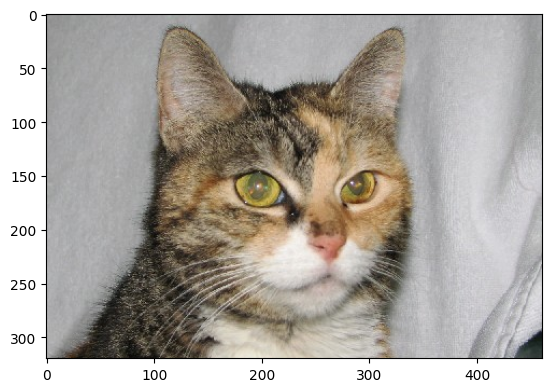

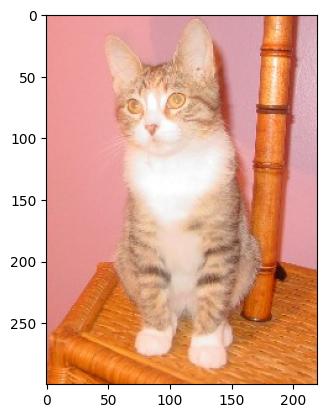

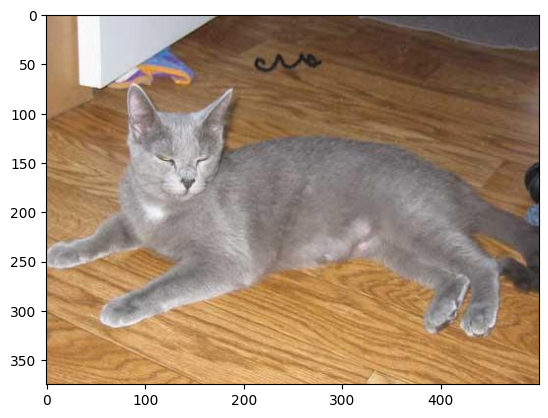

In [13]:
dir_path = "IMAGES2/train/cat"
j=0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i)
    plt.imshow(img)
    plt.show()
    j+=1;
    if j>10:
        break

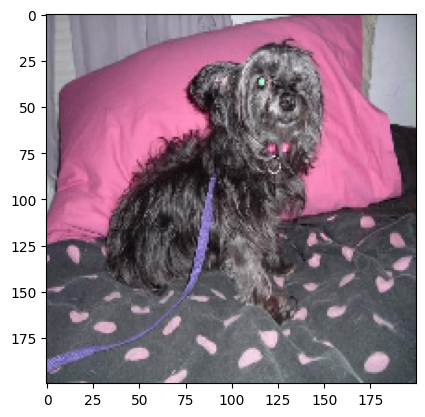

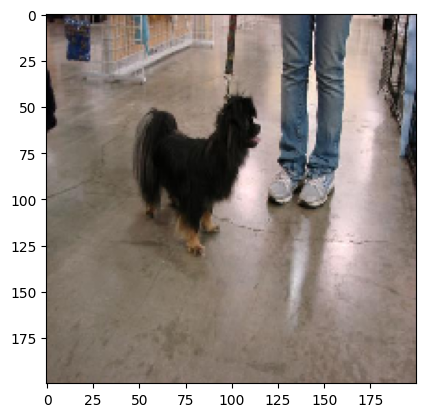

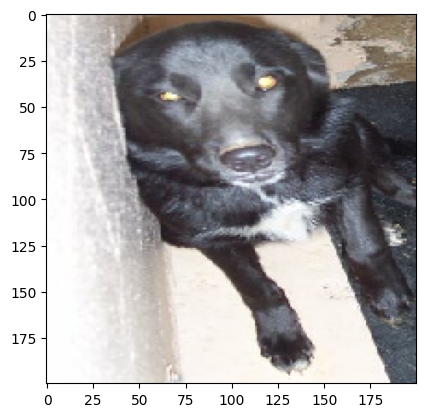

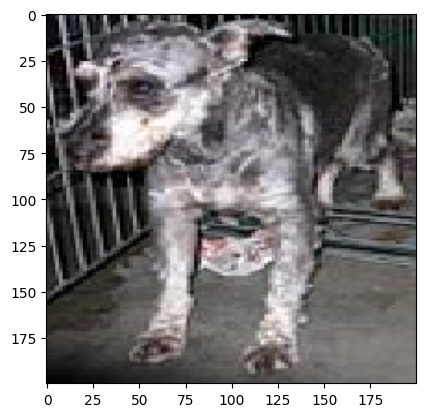

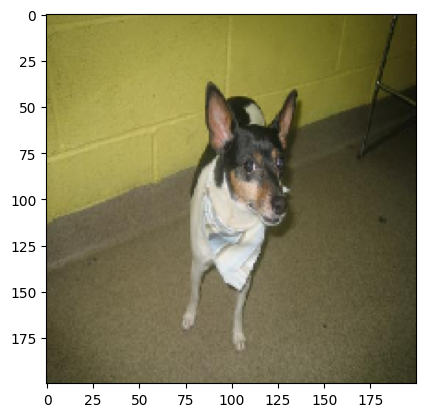

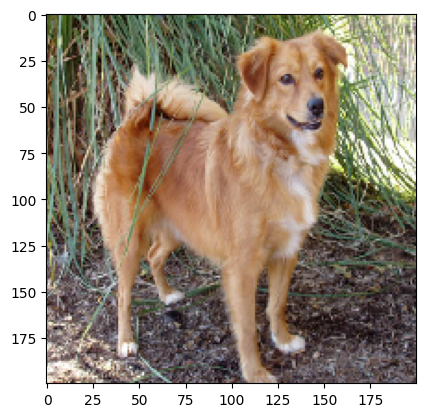

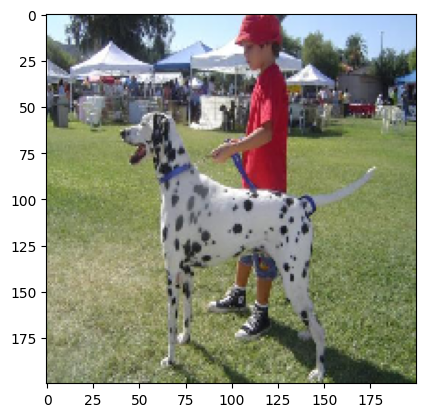

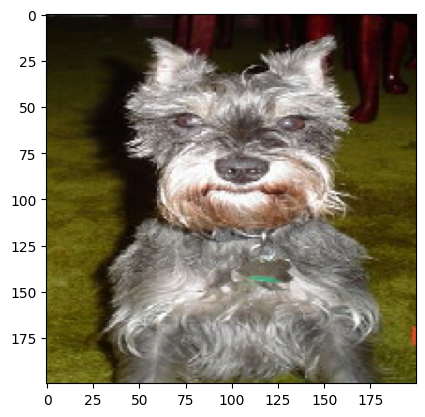

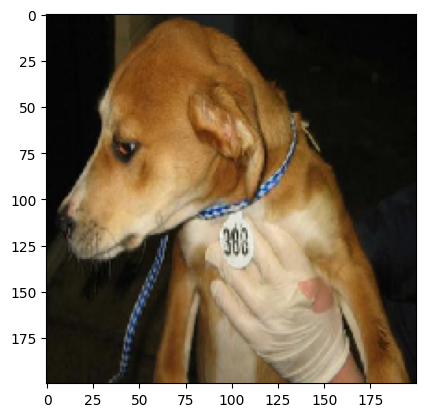

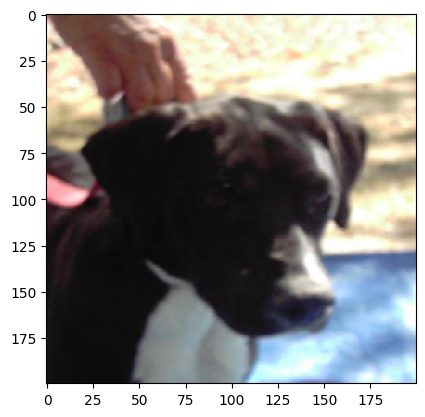

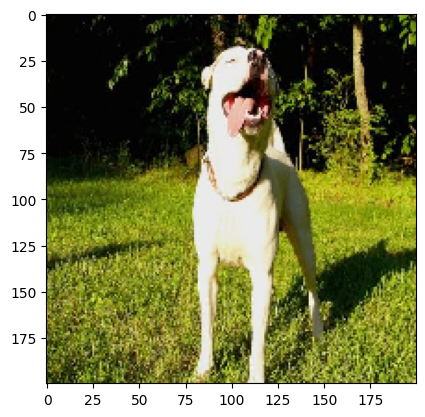

In [14]:
dir_path = "IMAGES2/train/dog"
j=0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    j+=1;
    if j>10:
        break

In [15]:
import numpy as np

# Initialize lists to collect data
subset_images = []
subset_labels = []

# Number of samples you want to extract
num_samples = 2000

# Iterate over the DirectoryIterator
for i, (images, labels) in enumerate(train_data):
    # Append the images and labels to the lists
    subset_images.extend(images)
    subset_labels.extend(labels)

    # Break the loop once we have collected enough samples
    if len(subset_images) >= num_samples:
        subset_images = np.array(subset_images[:num_samples])
        subset_labels = np.array(subset_labels[:num_samples])
        break

# Now `subset_images` and `subset_labels` contain the subset of data


In [16]:
subset_images.shape

(2000, 64, 64, 3)

In [17]:
subset_labels.shape

(2000,)

In [22]:
tuner.search(subset_images,subset_labels,epochs=3,validation_data=val_data)

Trial 3 Complete [00h 10m 35s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5
Total elapsed time: 00h 25m 01s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
17                |9                 |num_layers
112               |128               |conv_1_filters0
5                 |3                 |conv_1_kernel0
48                |80                |conv_1_filters1
3                 |5                 |conv_1_kernel1
2                 |17                |num_layers_1
128               |32                |dense_1_units0
80                |128               |dense_1_units1
32                |32                |conv_1_filters2
3                 |3                 |conv_1_kernel2
64                |32                |conv_1_filters3
5                 |3                 |conv_1_kernel3
112               |32                |conv_1_filters4
3                 |3                 |conv_1_kernel4
64                |32                |conv_1_filters5
5            

KeyboardInterrupt: 

In [23]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layers: 9
conv_1_filters0: 128
conv_1_kernel0: 3
conv_1_filters1: 80
conv_1_kernel1: 5
num_layers_1: 17
dense_1_units0: 32
dense_1_units1: 128
conv_1_filters2: 32
conv_1_kernel2: 3
conv_1_filters3: 32
conv_1_kernel3: 3
conv_1_filters4: 32
conv_1_kernel4: 3
conv_1_filters5: 32
conv_1_kernel5: 3
conv_1_filters6: 32
conv_1_kernel6: 3
conv_1_filters7: 32
conv_1_kernel7: 3
conv_1_filters8: 32
conv_1_kernel8: 3
dense_1_units2: 32
dense_1_units3: 32
dense_1_units4: 32
dense_1_units5: 32
dense_1_units6: 32
dense_1_units7: 32
dense_1_units8: 32
dense_1_units9: 32
dense_1_units10: 32
dense_1_units11: 32
dense_1_units12: 32
dense_1_units13: 32
dense_1_units14: 32
dense_1_units15: 32
dense_1_units16: 32
Score: 0.5

Trial 1 summary
Hyperparameters:
num_layers: 4
conv_1_filters0: 32
conv_1_kernel0: 3
conv_1_filters1: 48
conv_1_kernel1: 3
num_layer

# For Creating Model

In [18]:
model_1=Sequential()
model_1.add(Conv2D(filters=128 , kernel_size=3,activation="relu"))
model_1.add(Conv2D(filters=64, kernel_size=3,activation="relu"))
model_1.add(Conv2D(filters=64 , kernel_size=3,activation="relu"))
model_1.add(Flatten())
model_1.add(Dense(units=128,activation="relu"))
model_1.add(Dense(units=64,activation="relu"))
model_1.add(Dense(units=32,activation="relu"))
model_1.add(Dense(units=1,activation="sigmoid"))
model_1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# For Fitting the Model

In [19]:
model_1.fit(train_data,epochs=3,batch_size=32,validation_data=val_data)

Epoch 1/3


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


233/625 ━━━━━━━━━━━━━━━━━━━━ 4:00 614ms/step - accuracy: 0.4964 - loss: 0.7365

c:\Python312\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 459s 724ms/step - accuracy: 0.5193 - loss: 0.7103 - val_accuracy: 0.5965 - val_loss: 0.6717
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 367s 586ms/step - accuracy: 0.5983 - loss: 0.6699 - val_accuracy: 0.5837 - val_loss: 0.6629
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 333s 532ms/step - accuracy: 0.6668 - loss: 0.6102 - val_accuracy: 0.6309 - val_loss: 0.6474


In [22]:
import pickle
pickle.dump(model_1,open("Prediction.pkl","wb"))

# For single Image

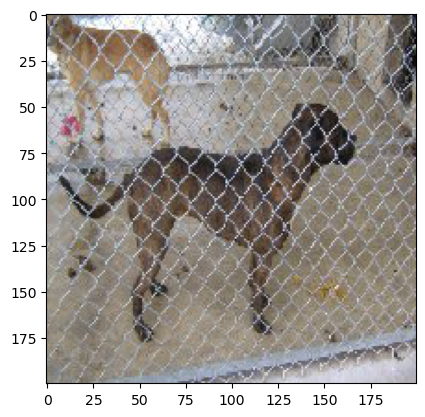

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Cat


In [195]:
picture=image.load_img("IMAGES2/test/dog/10187.jpg",target_size=(64,64))
pic=image.load_img("IMAGES2/test/dog/10187.jpg",target_size=(200,200))
plt.imshow(pic)
plt.show()
picture=image.img_to_array(picture)
picture=picture/255
IA = np.expand_dims(picture,axis=0)
testimg = np.vstack([IA])
ans=round(model_1.predict(testimg)[0][0])
class_name=list(train_data.class_indices)[ans]
print(class_name)

# For whole testing set

In [186]:
import os

for i in os.listdir("IMAGES2/test/"):
    a=0
    for j in os.listdir("IMAGES2/test/{}".format(i)):
        picture=image.load_img("IMAGEs2/test/{}".format(i)+"//"+j,target_size=(64,64  ))
        picture=img_to_array(picture)
        picture=picture/255
        IA = np.expand_dims(picture,axis=0)
        testimg = np.vstack([IA])
        ans=round(model_1.predict(testimg)[0][0])
        class_name=list(train_data.class_indices)[ans]
        print(class_name)
        a+=1
        if a>10:
            break
        
        
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Dog
